In [1]:
!pip install -U scikit-fuzzy

     |████████████████████████████████| 1.0MB 5.9MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-cp36-none-any.whl size=894070 sha256=9d48ab92b75ababa563ccabfd6c1fa28426d272af8a40a5c951e84bf8aae68bc
  Stored in directory: /root/.cache/pip/wheels/b9/4e/77/da79b16f64ef1738d95486e2731eea09d73e90a72465096600
Successfully built scikit-fuzzy


In [2]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz

colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

# Define three cluster centers
centers = [[4, 2],[1, 7],[5, 6]]

# Define three cluster sigmas in x and y, respectively
sigmas = [[0.8, 0.3],[0.3, 0.5],[1.1, 0.7]]

# Generate test data
np.random.seed(42) # Set seed for reproducibility
xpts = np.zeros(1)
ypts = np.zeros(1)
labels = np.zeros(1)
for i, ((xmu, ymu), (xsigma, ysigma)) in enumerate(zip(centers, sigmas)):
   xpts = np.hstack((xpts, np.random.standard_normal(200) * xsigma + xmu))
   ypts = np.hstack((ypts, np.random.standard_normal(200) * ysigma + ymu))
   labels = np.hstack((labels, np.ones(200) * i))

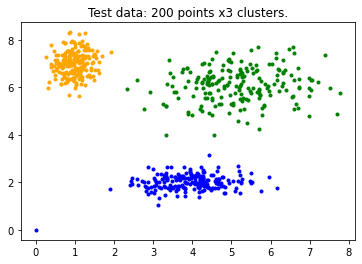

In [ ]:
# Visualize the test data
fig0, ax0 = plt.subplots()
for label in range(3):
     ax0.plot(xpts[labels == label], ypts[labels == label], '.',
     color=colors[label])
     ax0.set_title('Test data: 200 points x3 clusters.')

# Clustering

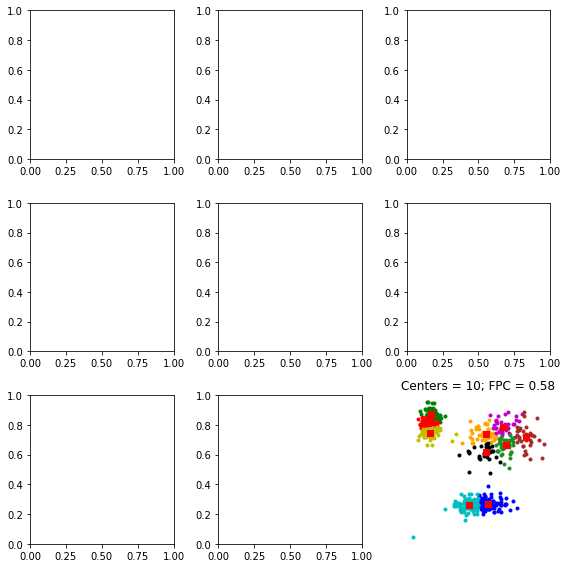

In [3]:
# We will cluster our data into 2 to 9 Clusters.
# Set up the loop and plot
fig1, axes1 = plt.subplots(3, 3, figsize=(8, 8))
alldata = np.vstack((xpts, ypts))
fpcs = []

for ncenters, ax in enumerate(axes1.reshape(-1), 2):
     cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(alldata, ncenters, 2, error=0.005, maxiter=1000, init=None)

# Store fpc values for later
fpcs.append(fpc)

# Plot assigned clusters, for each data point in training set
cluster_membership = np.argmax(u, axis=0)
for j in range(ncenters):
   ax.plot(xpts[cluster_membership == j],ypts[cluster_membership == j], '.', color=colors[j])


# Mark the center of each fuzzy cluster
for pt in cntr:
   ax.plot(pt[0], pt[1], 'rs')

ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(ncenters, fpc))
ax.axis('off')

fig1.tight_layout()